In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Load the data from CSV file into a pandas dataframe
df = pd.read_csv("webDev5.csv")

# Convert the 'date' column to datetime format and set it as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


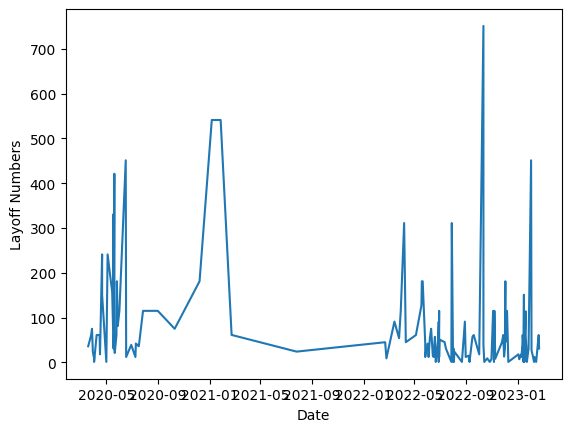

In [2]:
plt.plot(df)
plt.xlabel('Date')
plt.ylabel('Layoff Numbers')
plt.show()

In [3]:
from statsmodels.tsa.stattools import adfuller

# ADF test function
def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# Check the stationarity of the data using the ADF test
adf_test(df['laid_off'])


ADF Statistic: -10.15433023854905
p-value: 7.801352479489062e-18
Critical Values:
   1%: -3.477261624048995
   5%: -2.8821181874544233
   10%: -2.5777431104939494


In [4]:
# First-order differencing to make the data stationary
diff = df['laid_off'].diff().dropna()

# Check the stationarity of the differenced data
adf_test(diff)


ADF Statistic: -6.4517039877146205
p-value: 1.517822336847948e-08
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


In [5]:
# Split the data into training and test sets
train = df['laid_off'].iloc[:-12]
test = df['laid_off'].iloc[-12:]

# Fit an AutoReg model to the training data
model = AutoReg(train, lags=1)
model_fit = model.fit()


c:\Users\white\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [14]:
# Make predictions for the test set using the fitted ARIMA model
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)


c:\Users\white\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\white\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the MAE and RMSE metrics
mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')


MAE: 81.53
RMSE: 121.46


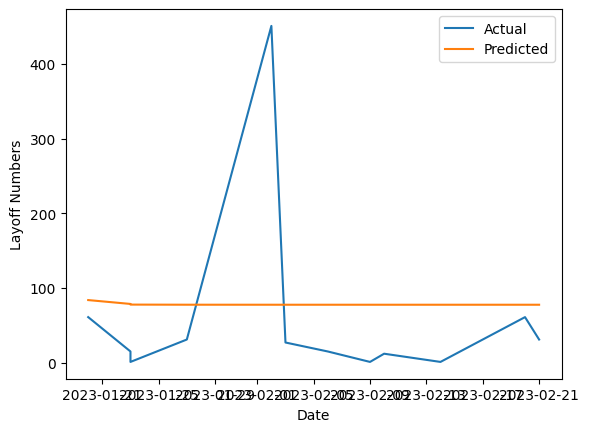